In [21]:
import numpy as np
import pandas as pd
import graphviz

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (20,10)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree
from sklearn.tree import export_graphviz

from feather import read_dataframe

In [2]:
df = pd.read_csv('./data/dataFinal.csv')
df.dtypes

Unnamed: 0      object
yDistance      float64
xDistance      float64
theta          float64
width          float64
height         float64
centerX        float64
centerY        float64
aspectRatio    float64
heightRatio    float64
yDiff          float64
dtype: object

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df['theta'].unique()

array([  0.,  -5.,   5.,  10.,  15.,  20.,  25., -10., -15., -20., -25.,
       -30.,  30., -35.,  35.,  40., -40.])

In [ ]:
df.loc[df.theta=='-10c', 'theta'] = '-10'

In [5]:
df.theta = df.theta.astype(float)
df.yDistance = df.yDistance.astype(float)
df.xDistance = df.xDistance.astype(float)

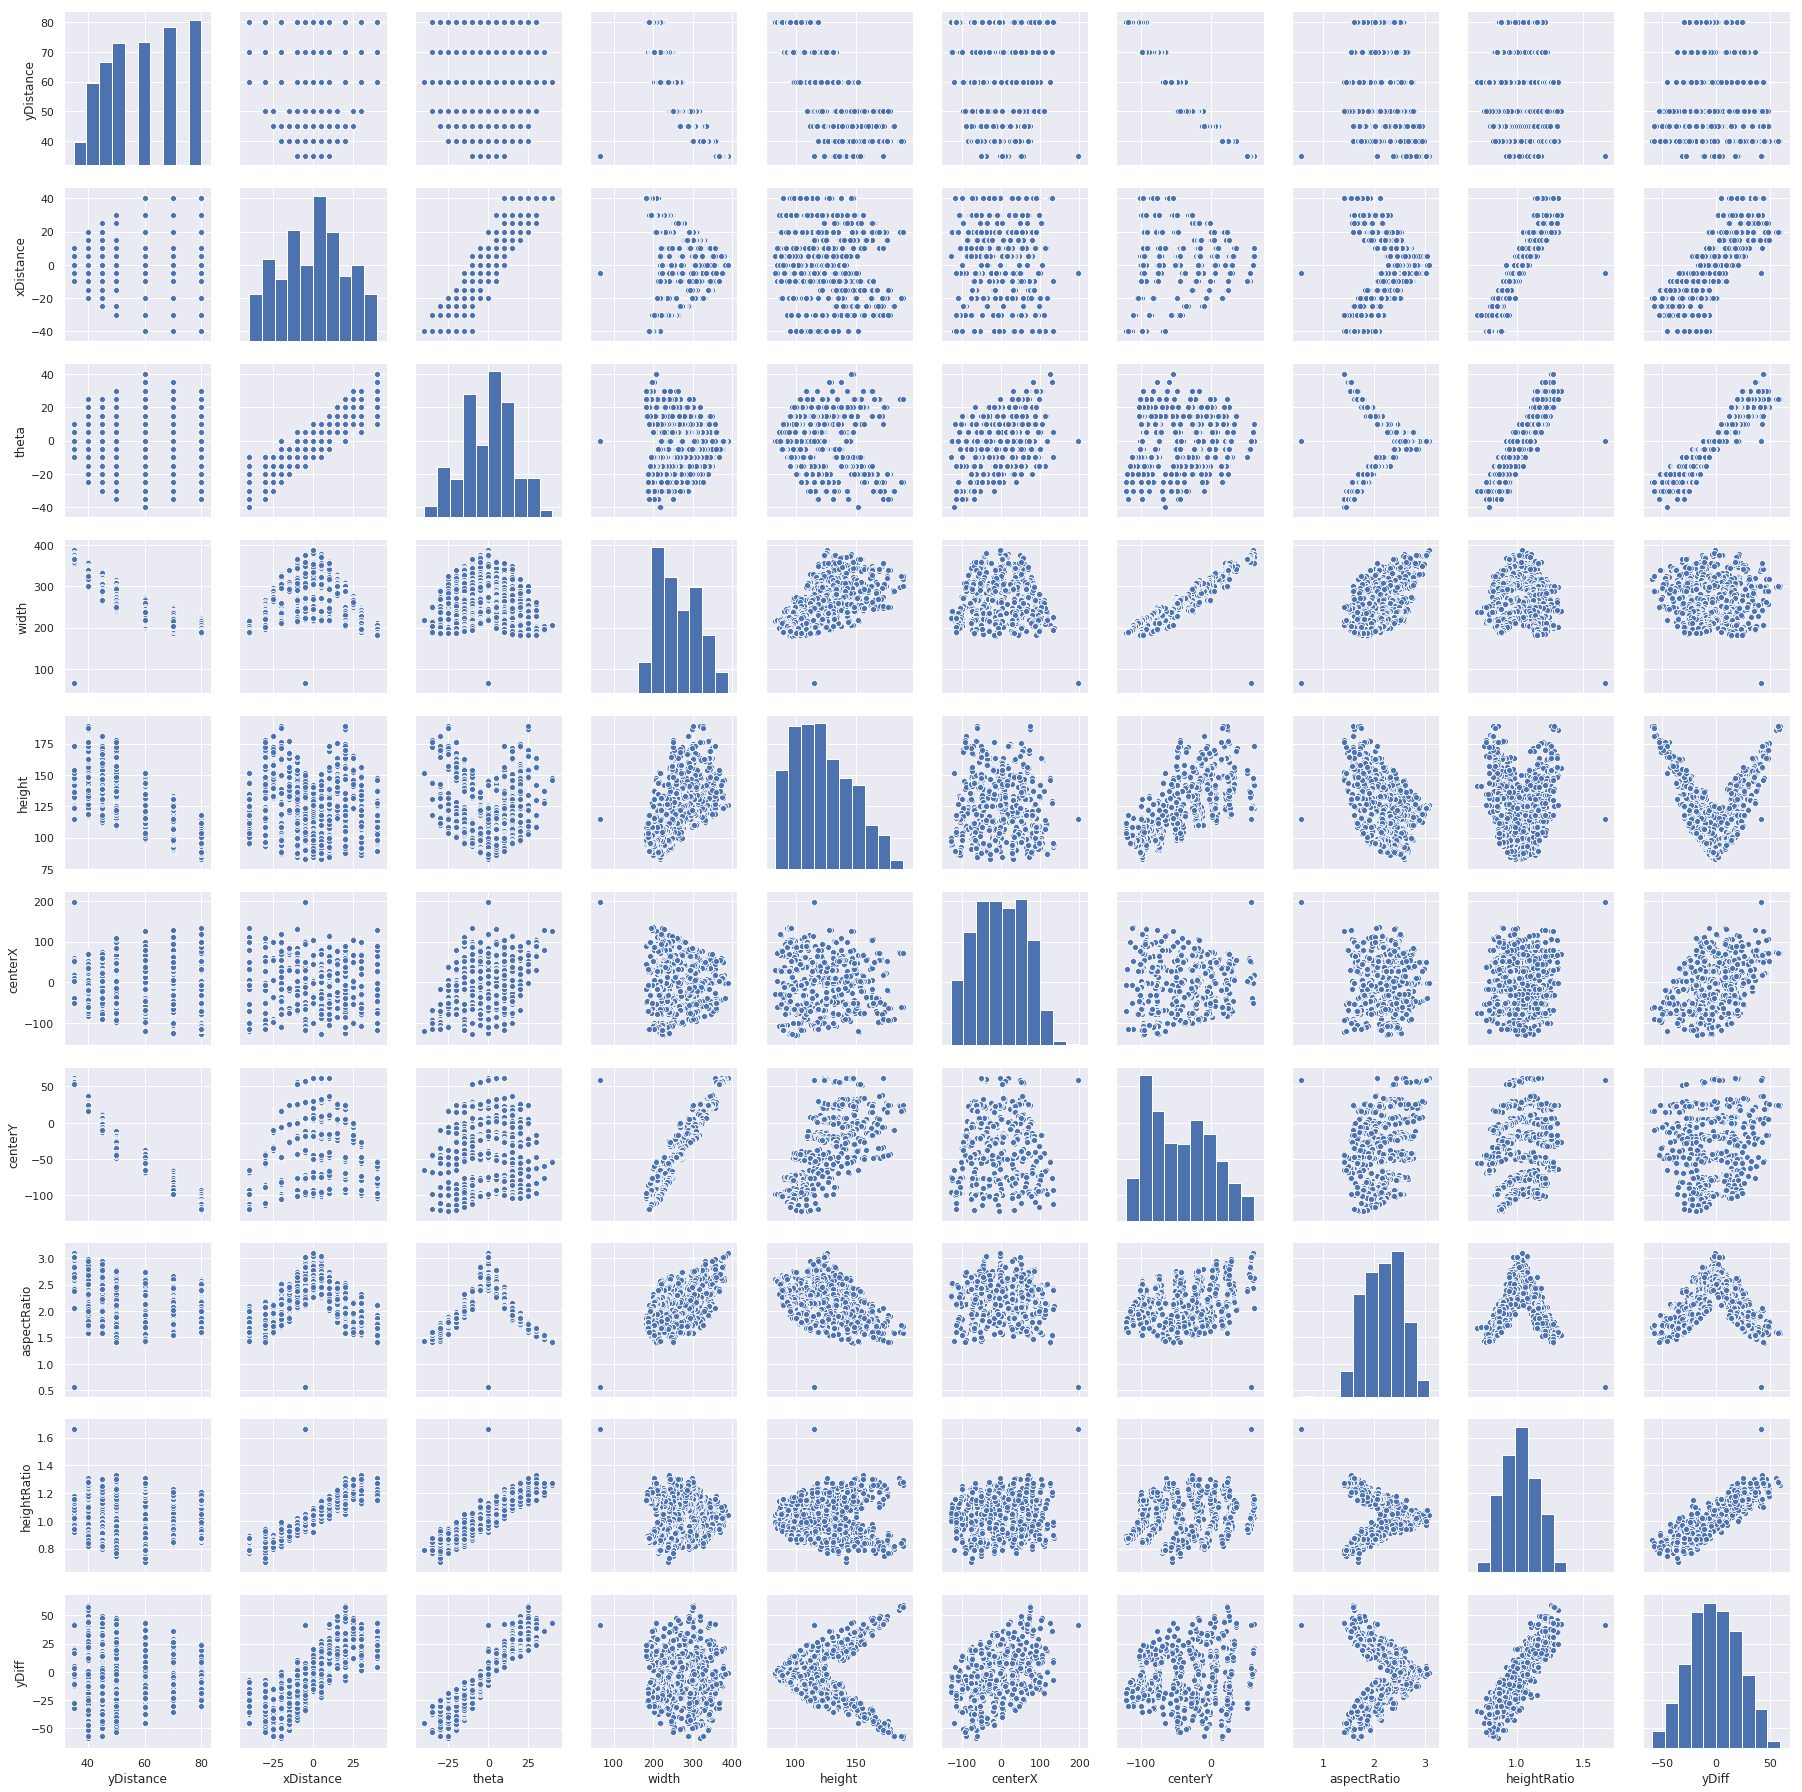

In [6]:
sns.pairplot(df)

In [7]:
df.columns = ['y', 'x', 'theta', 'width', 'height', 'center_x', 'center_y', 'aspect_ratio', 'height_ratio', 'y_diff']

In [8]:
df.columns

Index(['y', 'x', 'theta', 'width', 'height', 'center_x', 'center_y',
       'aspect_ratio', 'height_ratio', 'y_diff'],
      dtype='object')

In [9]:
df2 = df.groupby(['y','x','theta']).agg({'width':'mean', 'height':'mean', 'center_x':'mean', 'center_y':'mean',
                                  'aspect_ratio':'mean', 'height_ratio':'mean', 'y_diff':'mean'}).reset_index()

In [10]:
# RF
X = df2.drop(['x', 'y', 'theta', 'width'], axis=1)
y = df2[['x', 'y', 'theta']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [48]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [49]:
rf = rf.fit(X_train, y_train)

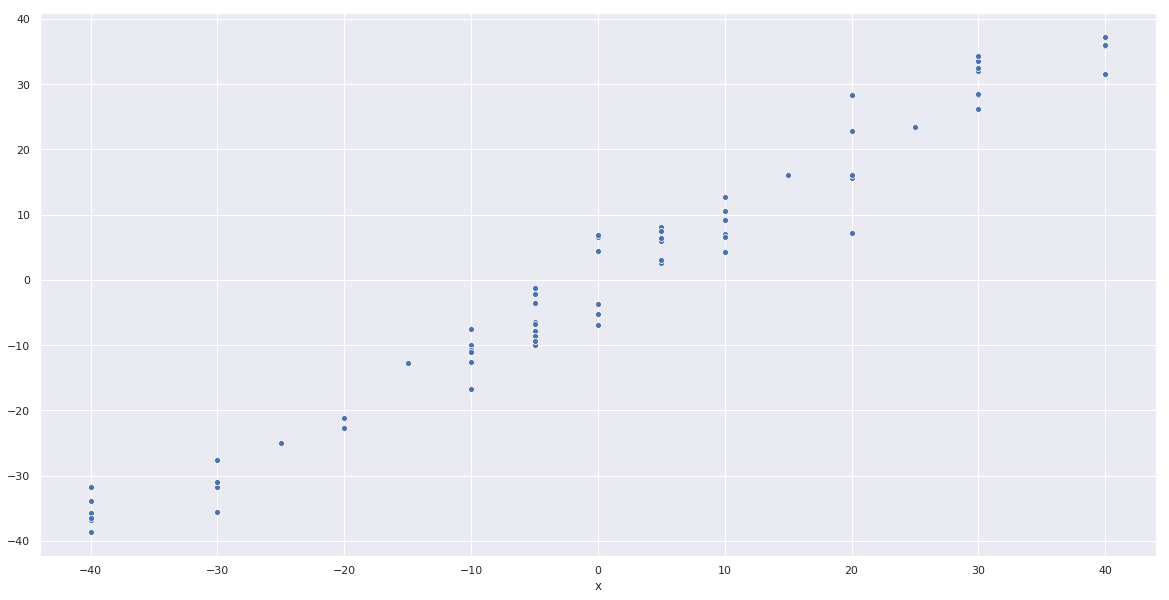

In [50]:
sns.scatterplot(y_test.x, rf.predict(X_test)[:,0])

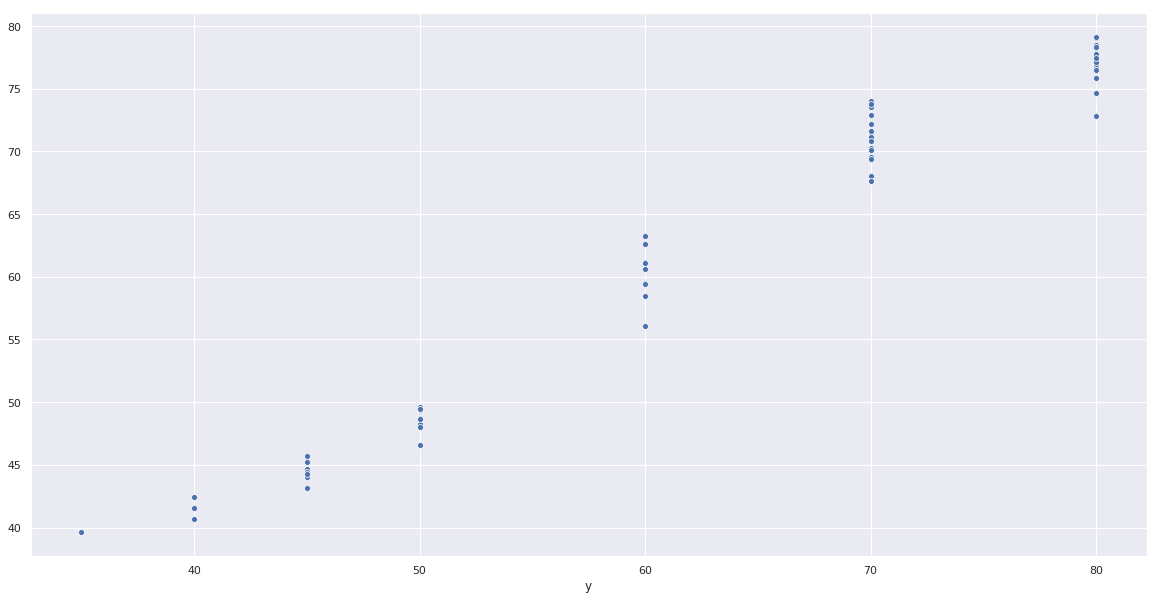

In [51]:
sns.scatterplot(y_test.y, rf.predict(X_test)[:,1])

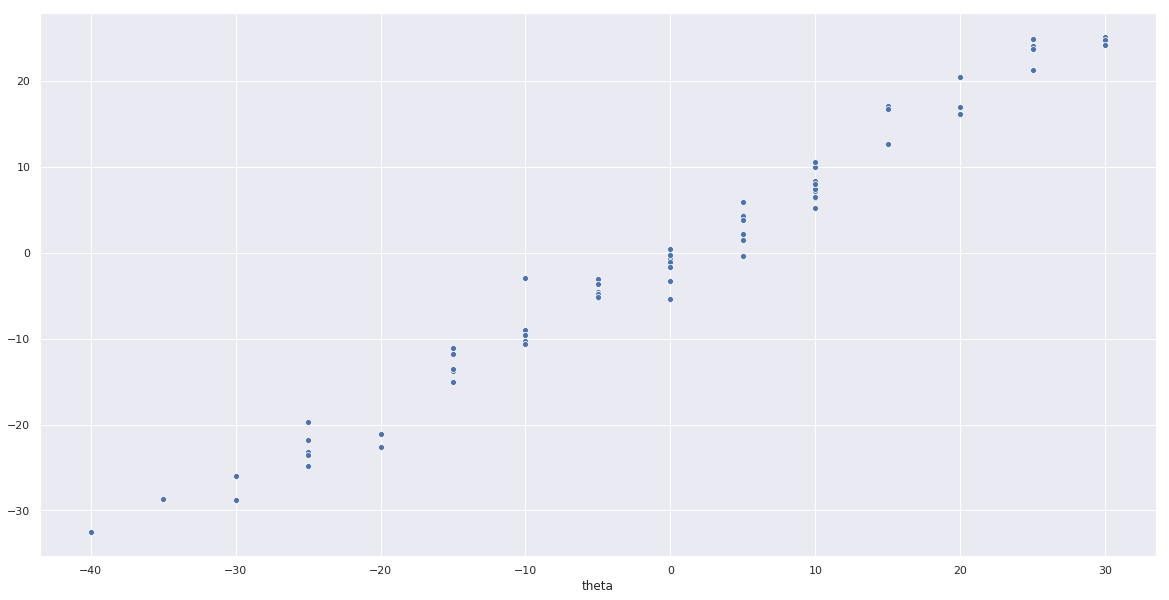

In [52]:
sns.scatterplot(y_test.theta, rf.predict(X_test)[:,2])

In [53]:
accuracy = ( rf.score ( X_test , y_test ))
accuracy

0.96635726413105